In [2]:
import py_compile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from dotenv import load_dotenv
import glob
from mymodule import myfunc as mf
from mymodule import lic_internal
import pylab as pltz
load_dotenv()
imgout = os.environ["imgout"]
root_dir = os.environ["root_dir"]

In [3]:
def lic(xarray,yarray,outnamepng):
    dpi = 100
    size = 700
    video = False

    vortex_spacing = 0.5
    extra_factor = 2.

    a = np.array([1,0])*vortex_spacing
    b = np.array([np.cos(np.pi/3),np.sin(np.pi/3)])*vortex_spacing
    rnv = int(2*extra_factor/vortex_spacing)
    vortices = [n*a+m*b for n in range(-rnv,rnv) for m in range(-rnv,rnv)]
    vortices = [(x,y) for (x,y) in vortices if -extra_factor<x<extra_factor and -extra_factor<y<extra_factor]


    xs = np.linspace(-1,1,size).astype(np.float32)[None,:]
    ys = np.linspace(-1,1,size).astype(np.float32)[:,None]

    vectors = np.zeros((size,size,2),dtype=np.float32)
    for (x,y) in vortices:
        rsq = (xs-x)**2+(ys-y)**2
        vectors[...,0] +=  (ys-y)/rsq
        vectors[...,1] += -(xs-x)/rsq

    texture = np.random.rand(size,size).astype(np.float32)

    plt.bone()
    frame=0

    if video:
        kernellen = 31
        for t in np.linspace(0,1,16*5):
            kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)*(1+np.sin(2*np.pi*5*(np.arange(kernellen)/float(kernellen)+t)))

            kernel = kernel.astype(np.float32)

            image = lic_internal.line_integral_convolution(vectors, texture, kernel)

            plt.clf()
            plt.axis('off')
            plt.figimage(image)
            plt.gcf().set_size_inches((size/float(dpi),size/float(dpi)))
            plt.savefig(outnamepng,dpi=dpi)
            frame += 1
    else:
        kernellen=31
        kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)
        kernel = kernel.astype(np.float32)

        image = lic_internal.line_integral_convolution(vectors, texture, kernel)

        plt.clf()
        plt.axis('off')
        plt.figimage(image)
        plt.gcf().set_size_inches((size/float(dpi),size/float(dpi)))
        plt.savefig("flow-image.png",dpi=dpi)


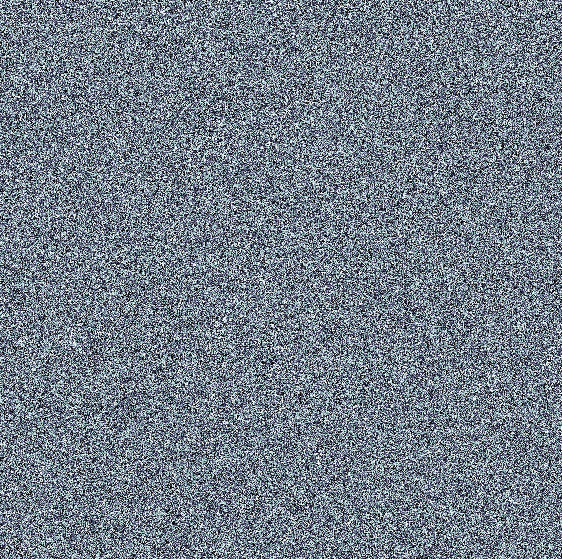

In [5]:
for i in range(1):
    for x in glob.glob(root_dir + f"imgout/snap77split1/magfieldx/{i}/*.npy")[500:501]:
        xfile = np.load(x)
        yfile = np.load(x.replace("magfieldx", "magfieldy"))
        out = root_dir + f"imgout/lictest/{i}/{i}_ohnostrm{x[-10:-4]}.ping"
        
        lic(xfile, yfile,out)

In [ ]:
###quiiit
Vector = np.stack([u, v], axis=2)
Vector = np.array(Vector, dtype=np.float32)
texture = np.random.rand(n, n).astype(np.float32)

plt.bone()
frame = 0
dpi = 1000
video = False
if video:
    kernellen = 31
    for t in np.linspace(0,1,16*5):
        kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)*(1+np.sin(2*np.pi*5*(np.arange(kernellen)/float(kernellen)+t)))
        kernel = kernel.astype(np.float32)
        image = lic_internal.line_integral_convolution(Vector, texture, kernel)
        frame += 1
else:
    kernellen = 31
    kernel = np.sin(np.arange(kernellen)*np.pi/kernellen)
    kernel = kernel.astype(np.float32)
    image = lic_internal.line_integral_convolution(Vector, texture, kernel)

speed_LIC = image[1:-1, 1:-1]*speed[1:-1, 1:-1]